In [1]:
import base64
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from dateutil import relativedelta

In [11]:
url = "https://docs.google.com/spreadsheets/d/1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A/export?format=csv"
df = (pd.read_csv(url).fillna(''))
df
# # Get the distinct beers
# unique_beers = df['beer'].unique()
# # Get the number of distinct beers
# num_unique_beers = df['beer'].nunique()

# print(num_unique_beers)  # This should print 4 in this example.
# print(unique_beers)  
# num_unique_beers = df['country'].nunique()

# print(num_unique_beers)  # This should print 4 in this example.
# num_unique_beers = df['beer'].nunique()

# print(num_unique_beers)  # This should print 4 in this example.

,id,sample_id,sample_link,type,type_of_data,target,sequencing_technique,published_date,publication,publication_link,dataset_link_1,dataset_link_2,beer,country,brewery,beer_id,study_id
0,26,SRR11032273,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/...,Sesotho,Lesotho,Thaba-Tseka,HN5,PRJNA605088
1,26,SRR11032274,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/074/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/074/...,Sesotho,Lesotho,Thaba-Tseka,HN4,PRJNA605088
2,26,SRR11032275,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/075/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/075/...,Sesotho,Lesotho,Thaba-Tseka,HN3,PRJNA605088
3,26,SRR11032276,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/076/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/076/...,Sesotho,Lesotho,Thaba-Tseka,HN2,PRJNA605088
4,26,SRR11032277,https://www.ebi.ac.uk/ena/browser/view/SRR1103...,Beer,Amplicon,16S,Illumina,June 2020,Bacterial and Fungal Dynamics During the Ferme...,https://www.frontiersin.org/articles/10.3389/f...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/077/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/077/...,Sesotho,Lesotho,Thaba-Tseka,HN1,PRJNA605088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,SRR5740378,https://www.ebi.ac.uk/ena/browser/view/SRR5740378,Beer,Amplicon,ITS,Illumina,Oct 2017,BeerDeCoded: the open beer metagenome project,https://www.researchgate.net/publication/31963...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/008/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR574/008/...,Malt Capone,Switzerland,La Nébuleuse,,PRJNA388541
300,101,SRR5890763,https://www.ebi.ac.uk/ena/browser/view/SRR5890763,Beer,Shotgun,,Illumina,Aug 2017,Identification of a novel interspecific hybrid...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR589/003/...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR589/003/...,Old Warehouse,United States,Epic Ales,,PRJNA390460
301,26,7093173,https://zenodo.org/record/7093173,Beer,Shotgun,,Nanopore,Dec 2019,,,https://zenodo.org/record/7093173/files/ABJ044...,,Chimay,Belgium,Chimay Brewery,,
302,26,6862301,https://zenodo.org/record/6862301,Beer,Shotgun,,Nanopore,Dec 2019,,,https://zenodo.org/record/6862301/files/BeerDE...,,Chimay,Belgium,Chimay Brewery,,


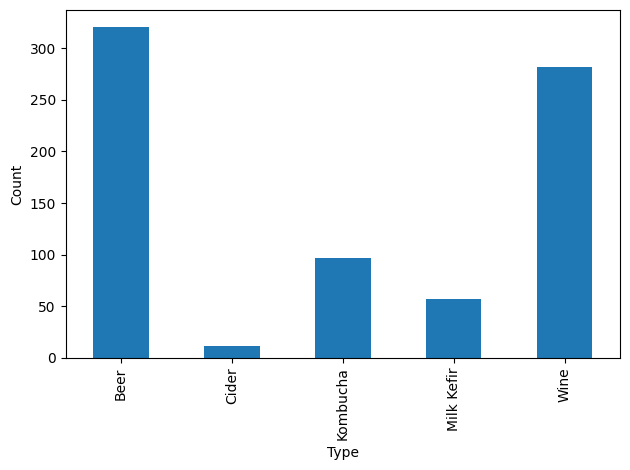

In [12]:
df_sample_count = df.groupby(['type'])['type'].count()

df_sample_count.plot(kind='bar')
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# plt.title('Sample Count by Type')  # Set title
# plt.legend(['Sample Count'])  # Set legend
plt.tight_layout()
plt.savefig('data_composition_by_type.png')
plt.show()

type_of_data  Amplicon  Shotgun
type                           
Beer             317.0      4.0
Cider             11.0      NaN
Kombucha          56.0     41.0
Milk Kefir        37.0     20.0
Wine             262.0     20.0


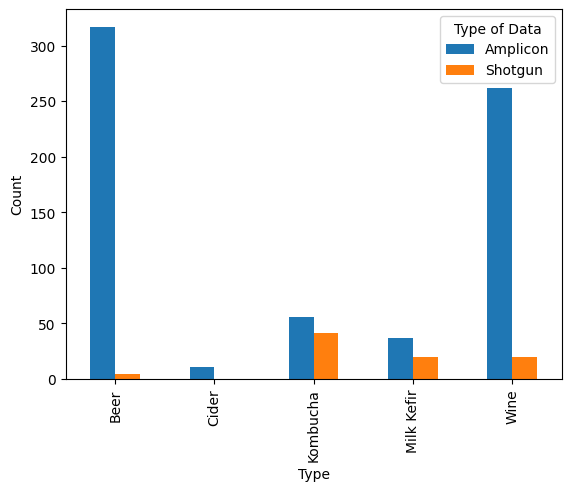

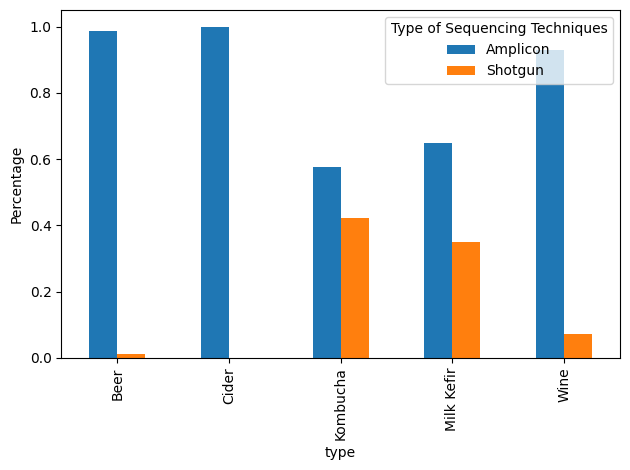

In [7]:

df_techniques = df.groupby(['type', 'type_of_data'])['id'].count().unstack('type_of_data')
print(df_techniques)

df_techniques.plot.bar()
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# plt.title('Techniques by Type and Data')  # Set title
plt.legend(title='Type of Data')  # Set legend with title
plt.show()

df_techniques_freq = df_techniques.divide(df_techniques.sum(axis=1), axis=0)

df_techniques_freq.plot(kind="bar")
# plt.xlabel('Type of Drinks')  # Set x-axis label
plt.ylabel('Percentage')  # Set y-axis label
# plt.title('Frequency of Sequencing Techniques')  # Set title
plt.legend(title='Type of Sequencing Techniques')  # Set legend with title
plt.tight_layout()
plt.savefig('data_composition_by_sequencing_techniques.png')
plt.show()

target        16S  26S  28S    ITS
type                              
Beer        119.0  NaN  NaN  198.0
Cider         6.0  NaN  NaN    5.0
Kombucha     28.0  NaN  NaN   28.0
Milk Kefir   20.0  NaN  2.0   15.0
Wine        117.0  6.0  NaN  139.0


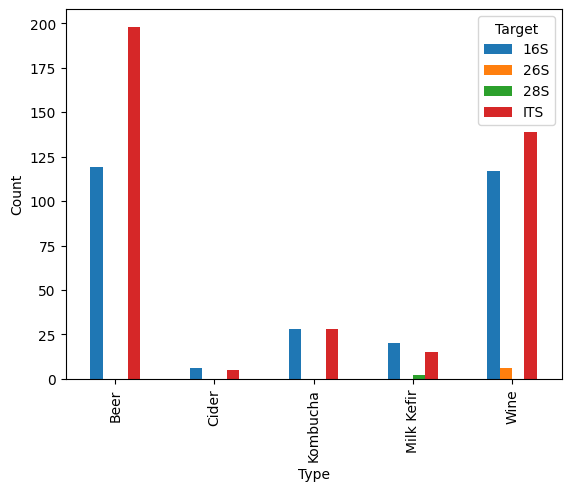

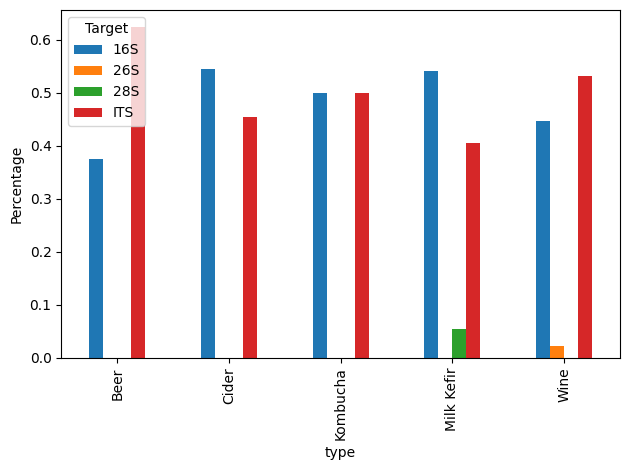

In [6]:
# Filtering and grouping the data
df_amplicon = df[df.type_of_data == 'Amplicon']
df_target = df_amplicon.groupby(['type', 'target'])['id'].count().unstack('target')
print(df_target)

# Plotting the grouped data
df_target.plot.bar()
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# plt.title('Count by Target Types for Amplicon Data')  # Set title
plt.legend(title='Target')  # Set legend with title
# plt.savefig('amplicon_data_composition_by_targets.png')
plt.show()

# Computing the frequency of each target and plotting
df_target_freq = df_target.divide(df_target.sum(axis=1), axis=0)

df_target_freq.plot(kind="bar")
# plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Percentage')  # Set y-axis label
# plt.title('Frequency of Targets by Type for Metabarcoding Data')  # Set title
plt.legend(title='Target')  # Set legend with title
plt.tight_layout()
plt.savefig('metabarcoding_data_composition_by_targets.png')
plt.show()

In [4]:
df2 = df[df.publication == 'Characteristics of bacterial and yeast microbiomes in spontaneous and mixed-fermentation beer and cider']
df_ITS = df2[df2.target=='16S']
df_ITS_beer = df_ITS[df_ITS.type=='Beer']
df_ITS_beer = df_ITS_beer.reset_index()

print(len(df_ITS_beer))
names = []
urls = []
for index, row in df_ITS_beer.iterrows():
    names.append(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz")
    urls.append(row['dataset_link_1'])
    print(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz {row['dataset_link_1']}")
    if row['dataset_link_2']:
        print(f"{row['sample_id']}_{index+1}_L001_R2_001.fastq.gz {row['dataset_link_2']}")
# for x in names:
#     print(x)
# for x in urls:
#     print(x)

# from ftplib import FTP

# def download_files(ftp_url, remote_paths, local_paths):
#     ftp = FTP(ftp_url)
#     ftp.login()

#     for remote_path, local_path in zip(remote_paths, local_paths):
#         with open(local_path, 'wb') as local_file:
#             ftp.retrbinary('RETR ' + remote_path, local_file.write)

#     ftp.quit()

# # FTP URL
# ftp_url = 'ftp.sra.ebi.ac.uk'

# download_files(ftp_url, urls, names)

14
SRR12823951_1_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/051/SRR12823951/SRR12823951.fastq.gz
SRR12823952_2_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/052/SRR12823952/SRR12823952.fastq.gz
SRR12823954_3_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/054/SRR12823954/SRR12823954.fastq.gz
SRR12823955_4_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/055/SRR12823955/SRR12823955.fastq.gz
SRR12823965_5_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/065/SRR12823965/SRR12823965.fastq.gz
SRR12823976_6_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/076/SRR12823976/SRR12823976.fastq.gz
SRR12823978_7_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/078/SRR12823978/SRR12823978.fastq.gz
SRR12823979_8_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/079/SRR12823979/SRR12823979.fastq.gz
SRR12823980_9_L001_R1_001.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR128/080/SRR1

In [8]:
df_bac_16S = df_bac[df_bac.target=='16S']
print(len(df_bac_16S))
df_bac_16S = df_bac_16S.reset_index()
for index, row in df_bac_16S.iterrows():
    print(f"{row['sample_id']}_{index+1}_L001_R1_001.fastq.gz {row['dataset_link_1']}")
    if row['dataset_link_2']:
        print(f"{row['sample_id']}_{index+1}_L001_R2_001.fastq.gz {row['dataset_link_2']}")

NameError: name 'df_bac' is not defined

In [9]:
df_beer = df[df.type == 'Beer']
df_beer = df_beer[df_beer.id != 4]
df_beer.to_json('db.json', orient='records')
print(len(df_beer))

301


In [10]:
import json

with open('db.json') as f:
    db_json = json.load(f)
    print(len(db_json))
    for ob in db_json:
        ob['dataset_links'] = []
        if(ob['dataset_link_1']!=None):
            if(len(ob['dataset_link_1'])!= 0):
                ob['dataset_links'].append(ob['dataset_link_1'])
            del(ob['dataset_link_1'])
        if(ob['dataset_link_2']!=None):
            if(len(ob['dataset_link_2'])!= 0):
                ob['dataset_links'].append(ob['dataset_link_2'])
            del(ob['dataset_link_2'])

with open('db_ready.json', 'w') as f:
    json.dump(db_json, f)

print(db_json)

301
[{'id': 26, 'sample_id': 'SRR11032273', 'sample_link': 'https://www.ebi.ac.uk/ena/browser/view/SRR11032273', 'type': 'Beer', 'type_of_data': 'Amplicon', 'target': '16S', 'sequencing_technique': 'Illumina ', 'published_date': 'June 2020', 'publication': 'Bacterial and Fungal Dynamics During the Fermentation Process of Sesotho, a Traditional Beer of Southern Africa', 'publication_link': 'https://www.frontiersin.org/articles/10.3389/fmicb.2020.01451/full', 'beer': 'Sesotho ', 'country': 'Lesotho', 'brewery': 'Thaba-Tseka', 'beer_id': 'HN5', 'study_id': 'PRJNA605088', 'dataset_links': ['ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/SRR11032273/SRR11032273_1.fastq.gz', 'ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR110/073/SRR11032273/SRR11032273_2.fastq.gz']}, {'id': 26, 'sample_id': 'SRR11032274', 'sample_link': 'https://www.ebi.ac.uk/ena/browser/view/SRR11032274', 'type': 'Beer', 'type_of_data': 'Amplicon', 'target': '16S', 'sequencing_technique': 'Illumina ', 'published_date': 'June 2020', 

In [4]:

# Define file paths and names
csv_files = ['data/Doppelbock and Marzen lagers_16S.csv', 'data/Sesotho_16S.csv', './data/Sour Beer 16S.csv']
json_files = []
merged_file = 'merged_data.json'

# Loop through CSV files and convert to JSON
for file in csv_files:
    csv_data = pd.read_csv(file)
    json_data = csv_data.to_json(orient='records')
    json_file = file.split('.')[0] + '.json'
    with open(json_file, 'w') as f:
        f.write(json_data)
    json_files.append(json_file)

# Merge all JSON files together
merged_data = []
for file in json_files:
    with open(file) as f:
        data = json.load(f)
    merged_data += data

# Write merged data to JSON file
with open(merged_file, 'w') as f:
    json.dump(merged_data, f)

NameError: name 'json' is not defined

16S        102
ITS        198
Shotgun      4
dtype: int64


/tmp/ipykernel_81834/428162232.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_beer_combined = df_beer_amplicon.append(pd.Series({'Shotgun': df_beer_shotgun}))


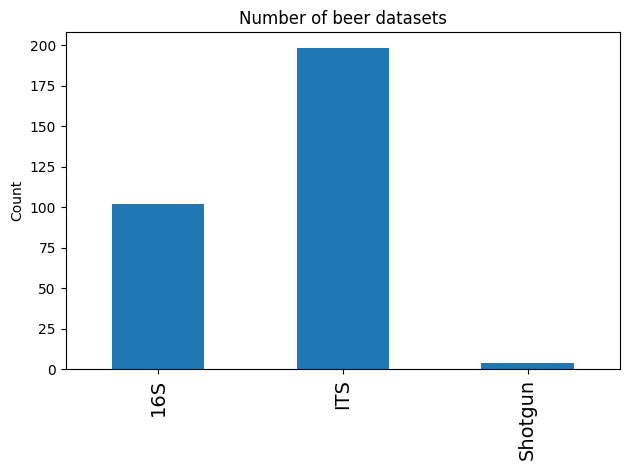

In [12]:
# Filter data for beer samples
df_beer = df[df['type'] == 'Beer']

# For amplicon data, further group by target
df_beer_amplicon = df_beer[df_beer['type_of_data'] == 'Amplicon'].groupby('target')['id'].count()

# For shotgun data, just count the samples
df_beer_shotgun = df_beer[df_beer['type_of_data'] == 'Shotgun']['id'].count()

# Combine the series
df_beer_combined = df_beer_amplicon.append(pd.Series({'Shotgun': df_beer_shotgun}))

# Print the counts
print(df_beer_combined)

# Plot the counts
df_beer_combined.plot.bar()
plt.ylabel('Count')  # Set y-axis label
plt.title('Number of beer datasets')  # Set title
# Increase x-labels font size
for label in plt.gca().get_xticklabels():
    label.set_fontsize(14)  # Adjust the value as needed
plt.tight_layout()
plt.savefig('16S_ITS_Shotgun.png')
plt.show()
